In [1]:
import numpy as np
import pandas as pd

In [3]:
path_to_file = 'C:/Users/panka/jupyter_notebook/data/CardioGoodFitness.csv'
df = pd.read_csv(path_to_file)

In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [12]:
# mean age is 28.78 but median age is 26; median is the age of the 
# average person and the mean is the average age of a person; if you
# sort the data then the middle value is the median. if the there are 
# even number of points, then average of middle 2 data is the median

# when median is lower than mean then data is called right skewed i.e
# if mean - median is +ve, then data is right skewed and vice versa 

# standard deviation - how far is every data from the middle. its a measure
# of how spread a typical observation is from average. There is another
# variable called MAD (mean absolute deivation) where instead of squaring
# difference, we take absolute of the difference of current value and mean

# standard deviation is very sensitive to outliers compared to MAD. Larger 
# the deviation, more it blows up. Both are measure of variablility.

# 33 at 75% point - 24 at 25% point = 50% data lies between 24 to 33
# This is call inter-quartile range, which is a difference of data at
# 75% (quarter-3 or upper quartile) and 25% (quarter-1 or lower quartile)
# range = max - min
# interquartile range = upper quartile - lower quartile
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 10.6+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Fitness'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Miles'}>,
        <AxesSubplot:title={'center':'Usage'}>]], dtype=object)

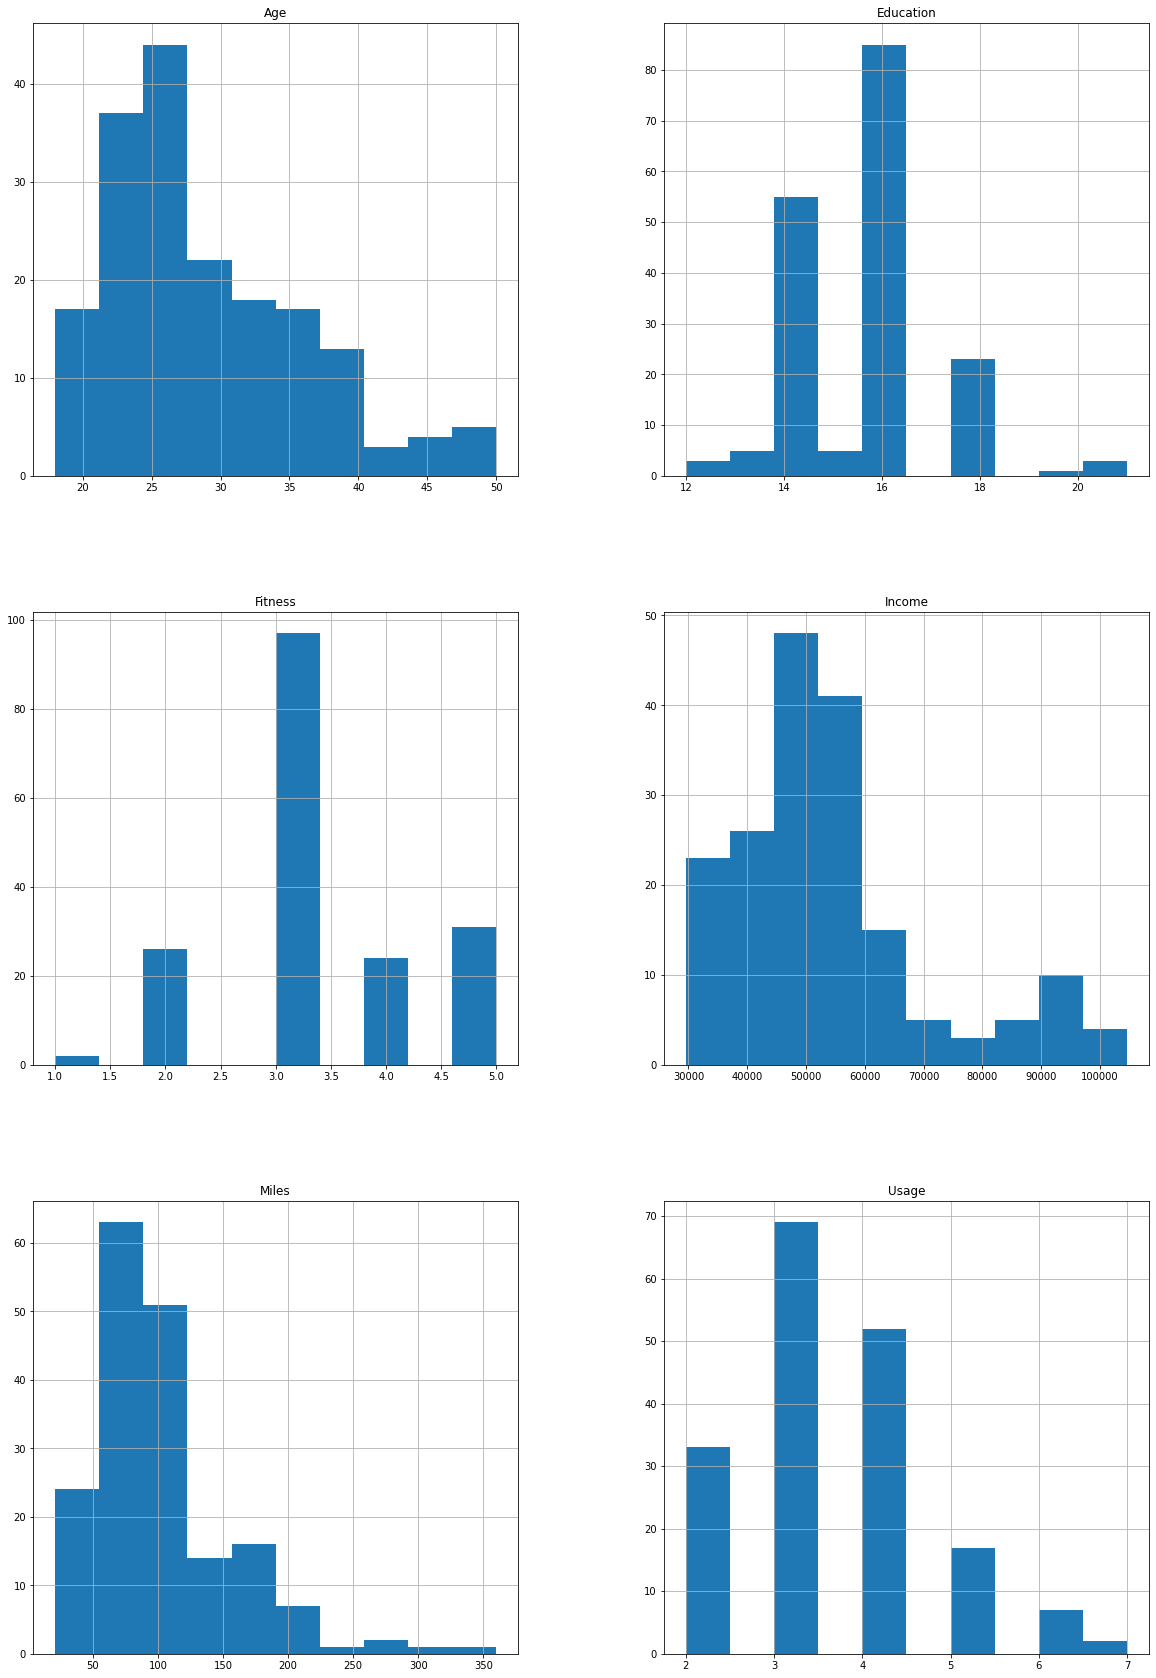

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20, 30))

<AxesSubplot:xlabel='Gender', ylabel='Age'>

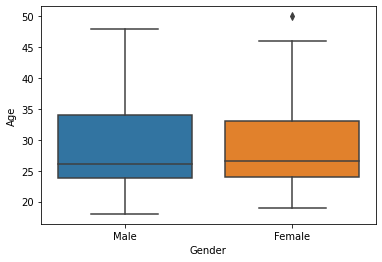

In [17]:
import seaborn as sns

# The box plot used to be called box and whisker plot
# the upper edge of the box is upper quartile and bottom edge of the
# box is lower quartile and a line in between is the median
# the end of the whiskers is 1.5 times the interquartile range above 
# the box

# If a data point lies outside the whisker, it is shown as a point (outlier). 
# and if data ends before it, whisker also ends

# This box plot is also known as 5-point summary

# from the below box-plot, we can also infer that data is right skewed
# as median is closed to the quarte-1
sns.boxplot(x="Gender", y="Age", data=df)

In [18]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33
